# Лабораторная работа №6
## "Численное дифференцирование и решение задачи Коши"

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

---

### Задача 6.1
Исследовать поведение погрешностей при численном дифференцировании функции.

$ N = 39 $


**ПОРЯДОК РЕШЕНИЯ ЗАДАЧИ**
1. Взять функцию из задачи 5.2. Выбрать фиксированную точку $c$ на отрезке $[a,b]$ и вычислить значения производных, указанных в индивидуальном варианте в точке $c$.
2. Задать массив шагов $ h_k = 10^{-k}, k=1,…,15 $, и вычислить массивы приближенныx значений производных в точке $c$ по формуле (1) и по формуле из индивидуального варианта (односторонняя разностная производная 2-го порядка (5)): $$ d1_k = \frac{f(c + h_k) - f(c)}{h_k} \text{    (1)   и }  d5_k = \frac{f(c - 2h_k) - 4f(c - h_k) + 3f(c)}{2h_k}  \text{   (5), }k=1,…,15. $$  Вычислить также массивы значений погрешностей: $ \Delta 1_k = |d1_k - f'(c)| $ и $ \Delta 5_k = |d5_k - f'(c)| $
3. По полученным таблицам результатов найти оптимальное значение шага дифференцирования для каждого метода. Результаты вычислений внести в первую часть таблицы (см. ПРИЛОЖЕНИЕ 6.B).
4. Проделать те же вычисления для производной более высокого порядка, указанной в индивидуальном варианте (формула 4-го порядка точности (11)): $$ f''(x) \approx \frac{-f(x - 2h) + 16f(x - h) - 30f(x) + 16f(x + h) - f(x + 2h)}{12h^2} $$ Найти оптимальное значение шага дифференцирования, результаты внести во вторую часть таблицы (см. ПРИЛОЖЕНИЕ 6.B).
5. По полученным данным построить графики погрешностей.
6. Вывести оценку погрешности указанной в индивидуальном варианте формулы.
7. Оформить отчет по работе.


In [2]:
def f(x):
    return np.log(x) * np.cos(2 * x) ** 2
def df(x):
    return np.cos(2 * x) ** 2 / x - 2 * np.log(x) * np.sin(4 * x)
def ddf(x):
    return - np.cos(2 * x) ** 2 / x ** 2 - 4 * np.sin(4 * x) / x - 8 * np.log(x) * np.cos(4 * x)
a, b, c = 7, 20, 10
print("Значение первой производной функции в точке с: ", df(c))
print("Значение второй производной функции в точке с: ", ddf(c))

Значение первой производной функции в точке с:  -3.414719814909471
Значение второй производной функции в точке с:  11.985742535803258


In [3]:
def d1_k(f, x, h):
    return (f(x + h) - f(x)) / h
def d5_k(f, x, h):
    return (f(x - 2*h) - 4*f(x - h) + 3*f(x)) / (2 * h)
h_k = []
approx_values1 = []
approx_values5 = []
for i in range (15):
    h_k.append(10 ** (-i-1))
    approx_values1.append(d1_k(f, c, h_k[i]))
    approx_values5.append(d5_k(f, c, h_k[i]))
print(h_k)
print(approx_values1)
print(approx_values5)

[0.1, 0.01, 0.001, 0.0001, 1e-05, 1e-06, 1e-07, 1e-08, 1e-09, 1e-10, 1e-11, 1e-12, 1e-13, 1e-14, 1e-15]
[-2.7297192648619872, -3.353856524554438, -3.408717526844518, -3.414120433535839, -3.414659885125903, -3.414713819427373, -3.414719194627658, -3.414720028960261, -3.4147200067558003, -3.4147196181777417, -3.414407645507822, -3.4150460237469815, -3.3967273438406664, -3.630429290524262, -6.050715484207102]
[-3.63825692367124, -3.416650488016404, -3.414738710856291, -3.4147200034417846, -3.414719816641209, -3.4147198093581466, -3.414719762506735, -3.414720395333859, -3.4147200622669516, -3.414721838623791, -3.41410233417605, -3.4150460237469815, -3.3661962106634746, -3.9412917374193057, -9.103828801926284]


In [4]:
delta1_k = []
delta5_k = []
for i in range (15):
    delta1_k.append(abs(approx_values1[i] - df(c)))
    delta5_k.append(abs(approx_values5[i] - df(c)))
print(delta1_k)
print(delta5_k)
h1 = 10**(-delta1_k.index(min(delta1_k))-1)
h5 = 10**(-delta5_k.index(min(delta5_k))-1)
print("Оптимальное значение шага для метода (1): ", h1)
print("Оптимальное значение шага для метода (5): ", h5)

[0.6850005500474836, 0.060863290355032795, 0.006002288064952843, 0.0005993813736320242, 5.9929783567724826e-05, 5.9954820978980194e-06, 6.202818130240928e-07, 2.1405078998171234e-07, 1.918463294892092e-07, 1.9673172912959558e-07, 0.0003121694016487986, 0.00032620883751066643, 0.017992471068804416, 0.21570947561479104, 2.6359956692976314]
[0.22353710876176924, 0.0019306731069330674, 1.8895946820141063e-05, 1.8853231376070312e-07, 1.731738308308195e-09, 5.551324289143622e-09, 5.240273592832523e-08, 5.80424388108014e-07, 2.4735748072046704e-07, 2.0237143201207175e-06, 0.0006174807334207166, 0.00032620883751066643, 0.04852360424599622, 0.5265719225098349, 5.689108987016812]
Оптимальное значение шага для метода (1):  1e-09
Оптимальное значение шага для метода (5):  1e-05


In [5]:
def d11_k(f, x, h):
    return (- f(x - 2*h) + 16*f(x - h) - 30*f(x) + 16*f(x + h) - f(x + 2*h)) / (12 * h ** 2)
approx_values11 = []
delta11_k = []
for i in range (15):
    approx_values11.append(d11_k(f, c, h_k[i]))
    delta11_k.append(abs(approx_values11[i] - ddf(c)))
h11 = 10**(-delta11_k.index(min(delta11_k))-1)
print(approx_values11)
print(delta11_k)
print("Оптимальное значение шага для метода (11): ", h11)

[11.982532271197284, 11.985742210305997, 11.985742535668605, 11.985742554473006, 11.98574207476414, 11.985870629338535, 11.988558294243983, 12.906342661267443, 161.907524424502, 20354.088784794534, 1387778.7807814458, 9251858.538542973, -925185853.854297, 1665334536937.7349, 0.0]
[0.003210264605973734, 3.254972611443918e-07, 1.3465317749705719e-10, 1.8669748413913112e-08, 4.6103911799377784e-07, 0.00012809353527742928, 0.0028157584407253466, 0.9206001254641851, 149.92178188869872, 20342.103042258732, 1387766.79503891, 9251846.552800437, 925185865.8400396, 1665334536925.749, 11.985742535803258]
Оптимальное значение шага для метода (11):  0.001


Функция: $f(x) = \ln(x)\cos^2(2x)$; $f'(x) = \frac{\cos^2(2x)}{x} - 2\ln(x)\sin(4x)$; $f''(x) = -\frac{\cos^2(2x)}{x^2} - \frac{4\sin(4x)}{x} - 8\ln(x)\cos(4x)$.

Отрезок: $\left[a, b\right] = \left[7, 20\right]$

Пусть $c = 10$.

Значения производных: $f'(c) = -3.414719814909471$, $f''(c) = 11.985742535803258$.

| $f'(c)$ | Первый результат при шаге $h=10^{-1}$ | Наилучший результат при шаге $h$ | Последний результат при шаге $h=10^{-15}$ |
|:-------|:-----------------------------------:|:---------------------------------:|:---------------------------------------:|
| Формула (1) | $$d1_1 = -2.73$$ $$\Delta1_1 = 0.685$$ | $$h=10^{-9}$$ $$d1_9 = -3.4147200067558003$$ $$\Delta1_9 = 1.92*10^{-7}$$ | $$d1_{15} = -6.05$$ $$\Delta1_{15} = 2.636$$ |
| Формула (5) | $$d4_1 = -3.64$$ $$\Delta4_1 = 0.224$$ | $$h=10^{-5}$$ $$d4_5 = -3.414719816641209$$ $$\Delta4_5 = 1.73*10^{-9}$$ | $$d4_{15} = -9.10$$ $$\Delta4_{15} = 5.689$$ |


| $f''(c)$ | Первый результат при шаге $h=10^{-1}$ | Наилучший результат при шаге $h$ | Последний результат при шаге $h=10^{-15}$ |
|:-------|:-----------------------------------:|:---------------------------------:|:---------------------------------------:|
| Формула (11)| $$d11_1 = 11.983$$ $$\Delta11_1 = 0.003$$ | $$h=10^{-3}$$ $$d11_3 = 11.985742535668605$$ $$\Delta11_3 = 1.35*10^{-10}$$ | $$d11_{15} = 0$$ $$\Delta11_{15} = 11.986$$ |

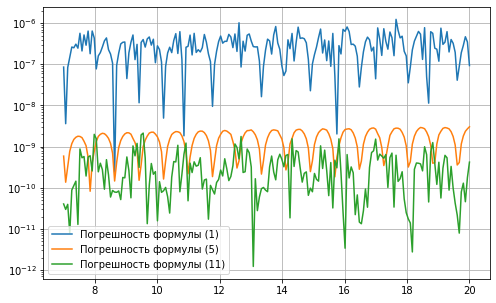

In [6]:
fig, axes = plt.subplots(1, figsize=(8, 5))
x_line = np.linspace(a, b, 200)
d1 = d1_k(f, x_line, h1)
d5 = d5_k(f, x_line, h5)
d11 = d11_k(f, x_line, h11)
axes.plot(x_line, abs(d1 - df(x_line)), label="Погрешность формулы (1)")
axes.plot(x_line, abs(d5 - df(x_line)), label="Погрешность формулы (5)")
axes.plot(x_line, abs(d11 - ddf(x_line)), label="Погрешность формулы (11)")
axes.set_yscale('log')
axes.grid()
axes.legend()

**Вывод формулы (5а)**
$$ R = \frac{M_3}{3}h^2 $$

$ r_i = f'_i - \frac{1}{2h}(f_{i-2} - 4f_{i-1} + 3f_i) = f'_i - \frac{1}{2h}\left[(f_i - 2hf'_i + \frac{(2h)^2f''_i}{2} - \frac{(2h)^3f'''_i}{6} + ...) - 4(f_i - hf'_i + \frac{h^2f''_i}{2} - \frac{h^3f'''_i}{6} + ...) + 3f_i \right] = \frac{1}{2h}\left[(-f_i+4f_i-3f_i) + (2hf'_i+2hf'_i-4hf'_i) + (-\frac{(2h)^2f''_i}{2}+\frac{4h^2f''_i}{2}) + (\frac{(2h)^3f'''_i}{6}-\frac{4h^3f'''_i}{6}) + o(h^3)\right] = \frac{1}{2h}(\frac{4h^3f'''_i}{6} + o(h^3)) = \frac{h^2f'''_i}{3} + o(h^2) $   
Окончательно: $ R = \frac{M_3}{3}h^2 $, где $ M_3 = \underset{[x-h, x+h]}\max|f'''(x)| $, что и требовалось доказать.

---

### Задача 6.2
Найти приближенное решение задачи Коши для обыкновенного дифференциального уравнения (ОДУ) 1 порядка с точностью $ \varepsilon = 10^{-6} $.

**ПОРЯДОК РЕШЕНИЯ ЗАДАЧИ**
1. Найти аналитическое решение задачи 24 из РЗ.
2. Составить программу вычисления решения методом Эйлера с заданной точностью, используя правило Рунге. Найти решение задачи с точностью $ \varepsilon = 10^{-6} $, число точек $N$ и шаг, при котором точность достигается. Построить график решения.
3. Составить программу вычисления решения с заданной точностью методом индивидуального варианта (экстраполяционный метод Адамса 3-го порядка): $$ y_{i+1} = y_i + \frac{h}{12}\left[23f(t_i, y_i) - 16f(t_{i-1}, y_{i-1}) + 5f(t_{i-2}, y_{i-2})\right]. $$ Найти решение задачи с заданной точностью, число точек $N$ и шаг, при котором точность достигается. Построить график решения задачи.
4. Сравнить полученные результаты. 
5. Оформить отчет по задаче.

In [7]:
def y(t): # Точное решение
    return 2 * np.cos(t) * np.exp(-np.cos(t)) + (2 * math.e - 2) * np.cos(t) / math.e

def f(t, y):
    return -y * np.tan(t) + np.sin(2*t) * np.exp(-np.cos(t))

# Метод Эйлера
def Eiler(y0, t0, T, f, h):
    N = int((T - t0) // h) + 1
    t_line = np.linspace(t0, T, N)
    y_line = [y0]
    for i in range(N-1):
        y_line.append(y_line[i] + h * f(t_line[i], y_line[i]))
    return t_line, y_line

# Погрешность по правилу Рунге
def RungeR(method, y0, t0, T, f, h, p):
    N = int((T - t0) // h)
    t1, y_2h = method(y0, t0, T, f, h)
    t2, y_h = method(y0, t0, T, f, h/2)
    eps_h = []
    for i in range(N):
        eps_h.append(abs((y_h[2*i] - y_2h[i])) / (2**p - 1))
    return max(eps_h)

t0 = 0
T = 0.8
y0 = 2

In [8]:
# Поиск шага, при котором заданная точность достигается
eps = 1e-6
n_ei = 2
h_ei = T / n_ei
while (abs(RungeR(Eiler, y0, t0, T, f, h_ei, 1)) > eps):
    n_ei *= 2
    h_ei = T / n_ei

print("Число точек: ", n_ei)
print("Шаг, при котором точность достигается: ", h_ei)

Число точек:  262144
Шаг, при котором точность достигается:  3.0517578125e-06


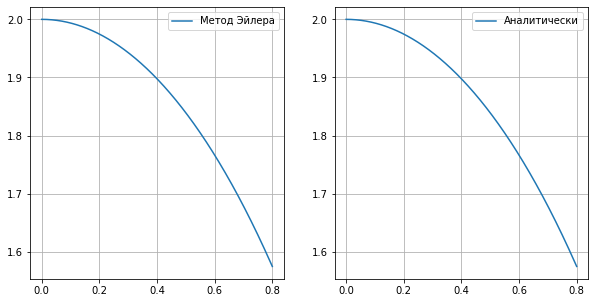

In [9]:
t, y_ = Eiler(y0, t0, T, f, h_ei)

fig, axs = plt.subplots(1, 2, figsize=(10,5))
axs[0].plot(t, y_, label = 'Метод Эйлера')
axs[0].legend()
axs[0].grid()

x = np.linspace(0, 0.8, 10000)

axs[1].plot(x, y(x), label = 'Аналитически')
axs[1].legend()
axs[1].grid()

In [10]:
def ExtrapolAdams3(y0, t0, T, f, h):
    N = int((T - t0) // h) + 1
    t_l = np.linspace(t0, T, N)
    y_l = [y0]
    
    for i in range(2):
        k1 = f(t_l[i],y_l[i])
        k2 = f(t_l[i] + h/2, y_l[i] + h * k1/2)
        k3 = f(t_l[i] + h*3/4, y_l[i] + h * 3/4 * k2)
        y_l.append(y_l[i] + (h/6)*(2*k1 + 3*k2 + 4*k3))
    
    for i in range(2, N - 1):
        y_l.append(y_l[i] + h / 12 * (23*f(t_l[i], y_l[i]) - 16*f(t_l[i-1], y_l[i-1]) + 5*f(t_l[i-2], y_l[i-2])))
    return t_l, y_l

In [11]:
# Поиск шага, при котором заданная точность достигается
eps = 1e-6
n_ea = 2
h_ea = T / n_ea
while (abs(RungeR(ExtrapolAdams3, y0, t0, T, f, h_ea, 3)) > eps):
    n_ea += 1
    h_ea = T / n_ea

print("Число точек: ", n_ea)
print("Шаг, при котором точность достигается: ", h_ea)

Число точек:  296
Шаг, при котором точность достигается:  0.002702702702702703


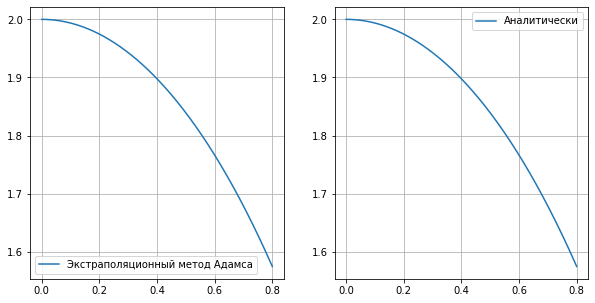

In [12]:
t, y_ = ExtrapolAdams3(y0, t0, T, f, h_ea)

fig, axs = plt.subplots(1, 2, figsize=(10,5))
axs[0].plot(t, y_, label = 'Экстраполяционный метод Адамса')
axs[0].legend()
axs[0].grid()

x = np.linspace(0, 0.8, 10000)

axs[1].plot(x, y(x), label = 'Аналитически')
axs[1].legend()
axs[1].grid()

**Сравнительная таблица результатов**

| Метод | Число точек $N$ | Шаг, при котором точность достигается |
|:---|:---:|:---:|
| Метод Эйлера | $262144$ | $3.05*10^{-6}$ |
| Экстраполяционный метод Адамса 3-го порядка | $296$ | $0.0027$ |